In [1]:
pip install owlready2

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install rdflib owlready2

Note: you may need to restart the kernel to use updated packages.


In [4]:
from owlready2 import *

# Créer un nouvel espace de noms OWL
onto = get_ontology("http://example.org/moteur.owl")

with onto:
    # Définition des classes
    class MoteurThermique(Thing): pass
    class Circuit(MoteurThermique): pass
    class Composant(Circuit): pass
    class Capteur(Composant): pass
    class FailureEvent(Thing): pass

    # Définition des relations
    class aPourCircuit(ObjectProperty):
        domain = [MoteurThermique]
        range = [Circuit]

    class aPourComposant(ObjectProperty):
        domain = [Circuit]
        range = [Composant]

    class aPourCapteur(ObjectProperty):
        domain = [Composant]
        range = [Capteur]

    class aUnFailureEvent(ObjectProperty):
        domain = [Composant]
        range = [FailureEvent]

    # Définition des attributs
    class probabilitéDéfaillance(DataProperty):
        domain = [FailureEvent]
        range = [float]

    class gravité(DataProperty):
        domain = [FailureEvent]
        range = [int]

# Sauvegarder l'ontologie en OWL
onto.save(file="moteur.owl", format="rdfxml")

print("Ontologie enregistrée sous 'moteur.owl'")


Ontologie enregistrée sous 'moteur.owl'


In [5]:
from rdflib import Graph

g = Graph()
g.parse("moteur.owl", format="xml")

# Afficher les triplets RDF
for s, p, o in g:
    print(f"{s} -> {p} -> {o}")


http://example.org/moteur.owl#Circuit -> http://www.w3.org/2000/01/rdf-schema#subClassOf -> http://example.org/moteur.owl#MoteurThermique
http://example.org/moteur.owl#aPourCapteur -> http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.w3.org/2002/07/owl#ObjectProperty
http://example.org/moteur.owl#MoteurThermique -> http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.w3.org/2002/07/owl#Class
http://example.org/moteur.owl#Composant -> http://www.w3.org/2000/01/rdf-schema#subClassOf -> http://example.org/moteur.owl#Circuit
http://example.org/moteur.owl#MoteurThermique -> http://www.w3.org/2000/01/rdf-schema#subClassOf -> http://www.w3.org/2002/07/owl#Thing
http://example.org/moteur.owl#Composant -> http://www.w3.org/1999/02/22-rdf-syntax-ns#type -> http://www.w3.org/2002/07/owl#Class
http://example.org/moteur.owl#aPourCapteur -> http://www.w3.org/2000/01/rdf-schema#domain -> http://example.org/moteur.owl#Composant
http://example.org/moteur.owl#gravité -> http://www.w

In [6]:
pip install networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


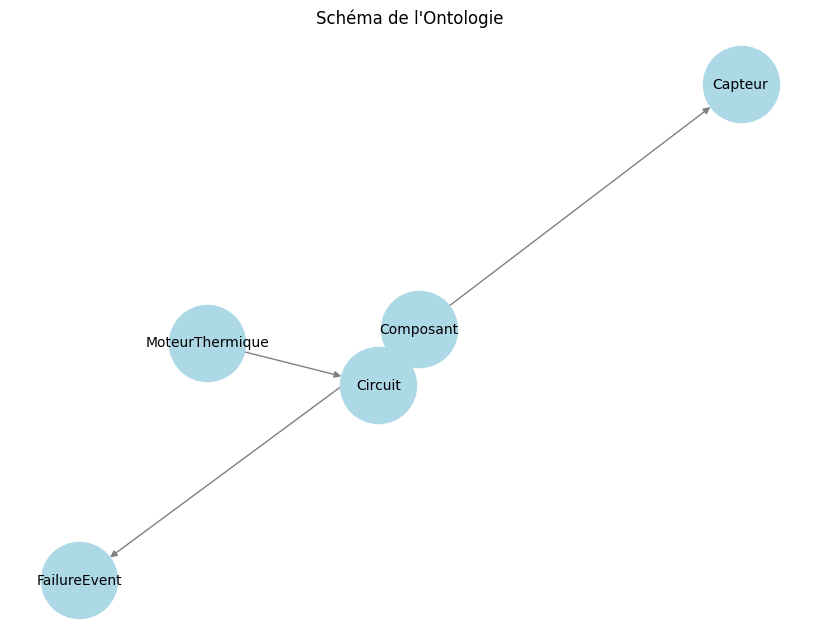

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Création d'un graphe
G = nx.DiGraph()

# Ajouter les relations
relations = [
    ("MoteurThermique", "Circuit"),
    ("Circuit", "Composant"),
    ("Composant", "Capteur"),
    ("Composant", "FailureEvent"),
]

for parent, child in relations:
    G.add_edge(parent, child)

# Dessiner le graphe
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.title("Schéma de l'Ontologie")
plt.show()


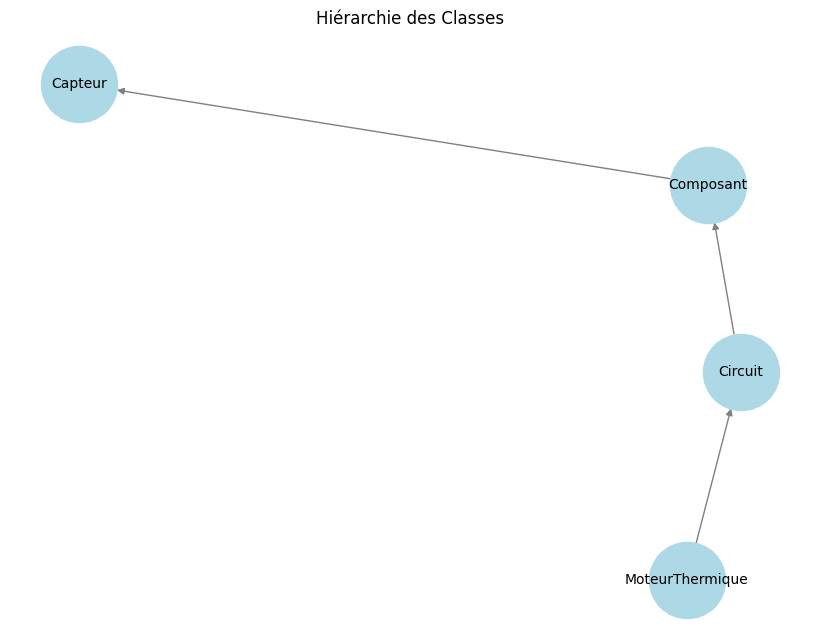

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Ajouter les relations de sous-classe
for cls in onto.classes():
    for sub_cls in cls.subclasses():
        G.add_edge(cls.name, sub_cls.name)

# Dessiner le graphe
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.title("Hiérarchie des Classes")
plt.show()


In [1]:
from owlready2 import *

# Charger l'ontologie
onto = get_ontology("maintenance.owl").load()

# Afficher toutes les classes de l'ontologie
print("Classes dans l'ontologie :")
for cls in onto.classes():
    print(cls)

# Afficher toutes les propriétés d'objets
print("\nPropriétés d'objets :")
for prop in onto.object_properties():
    print(prop)

# Afficher toutes les propriétés de données
print("\nPropriétés de données :")
for prop in onto.data_properties():
    print(prop)

# Créer une nouvelle instance de Equipement
new_equip = onto.Equipement("Equip1")
new_equip.Reference = "REF123"
print(f"\nNouvel équipement créé: {new_equip}, Référence: {new_equip.Reference}")

# Ajouter un capteur associé à un équipement
sensor = onto.Sensor("Sensor1")
sensor.Type = "Temperature"
sensor.Unit = "Celsius"
sensor.Threshold = 100
sensor.Value = 90

# Associer le capteur à l’équipement
sensor.isMonitoredBy.append(new_equip)

# Afficher l’association
print(f"\nLe capteur {sensor} est surveillé par {sensor.isMonitoredBy}")

# Sauvegarder l'ontologie après modification
onto.save(file="maintenance_updated.owl", format="rdfxml")
print("\nOntologie mise à jour et sauvegardée sous 'maintenance_updated.owl'.")


FileNotFoundError: [Errno 2] No such file or directory: 'maintenance.owl'